# Data Preprocessing

In [1]:
#import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import cv2
import pickle
# NOTE: you may have to download openCV, sklearn, PIL, 

## Feature Extraction

In [2]:
DIRECTORY = "./data/" # MacOS
# DIRECTORY = "C:data/" # Windows/PC

CATEGORIES = ['WithoutMask','IncorrectlyWornMask', 'WithMask']
IMG_SIZE = 64 # IMG_SIZE = 224 alternative size

#data
X = []
#labels(0,1,2)
y = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                X.append(img_array)
                y.append(class_num_label)
            except Exeption as e:
                pass
            
create_data()

## Convert to Numpy Array

In [3]:
# Get images as a 4,096 feature set
SAMPLE_SIZE = len(y)
data = np.array(X).flatten().reshape(SAMPLE_SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

Features, X shape:  (17687, 64, 64)
Target, y shape:  (17687,)
Data shape:  (17687, 4096)


## Plot Dataset Images

<ipython-input-4-57beb0ab1715>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5 / columns + 1, columns, i + 1)


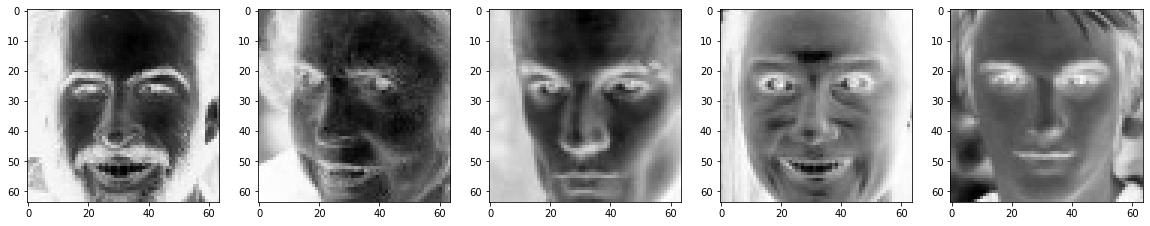

In [4]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')

## Save Dataset as Pickles
Since storing image files can be very big, pickling makes it easier to work with the data across our models. It also helps us avoid the feature extraction step again and ensure that we are all working with the same data.

In [5]:
#Saves us from having to regenerate our data by saving our data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("data.pickle", "wb")
pickle.dump(data, pickle_out)
pickle_out.close()

## Load Pickles

In [6]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in)

## Total Classification Counts

In [7]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17687
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 5895
# of With A Mask: 5883


## Split Train and Test

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  14149 
Length of our Testing data:  3538
